In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from data.dataset_utils import load_data

In [2]:
df = load_data(filtered=True)

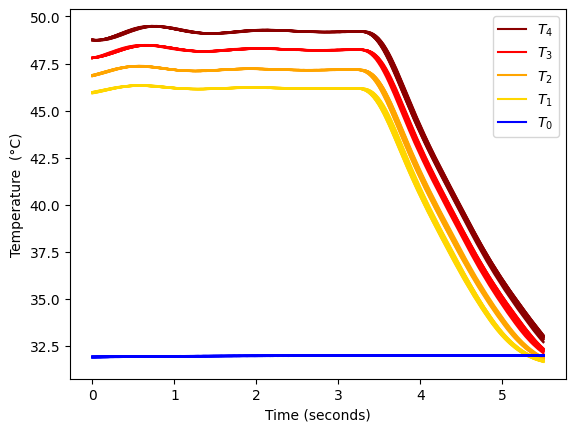

In [4]:
# plot all temperature values for a specific subject
time = np.linspace(0, 5.5, 176) # 176 temp values in 5.5 seconds
class_colors = {4: 'darkred', 3: 'red', 2: 'orange', 1: 'gold', 0: 'blue'}
plt.figure()

for class_id, color in class_colors.items():
    df_temp = df[(df['class_id'] == class_id) & (df['subject_name'] == '071309_w_21')]['temperature']
    for i in range(len(df_temp)):
        plt.plot(time, df_temp.iloc[i], color=color, label=f'$T_{class_id}$' if i == 0 else "")

plt.xlabel('Time (seconds)')
plt.ylabel('Temperature  (°C)')
plt.legend()
plt.show()


In [5]:
# describe the temperature levels for the first subject
chunks = [df['temperature'][i:i+20] for i in range(0, 100, 20)]
temp_levels_df = pd.concat([pd.concat(chunk.tolist(), axis=0) for chunk in chunks], axis=1)
temp_levels_df.columns = ['T_0', 'T_1', 'T_2', 'T_3', 'T_4']
temp_levels_df.describe()


,T_0,T_1,T_2,T_3,T_4
count,3520.000000,3520.000000,3520.000000,3520.000000,3520.000000
mean,31.970363,42.864585,43.781453,44.877684,45.845425
std,0.021438,5.073401,5.206451,5.227929,5.240646
min,31.895000,31.649000,31.774000,32.110000,32.692000
25%,31.958000,39.487250,40.413250,41.730500,42.772000
50%,31.978000,46.156000,47.125000,48.168000,49.113000
75%,31.986000,46.193000,47.178000,48.244250,49.216000
max,32.001000,46.357000,47.376000,48.484000,49.498000


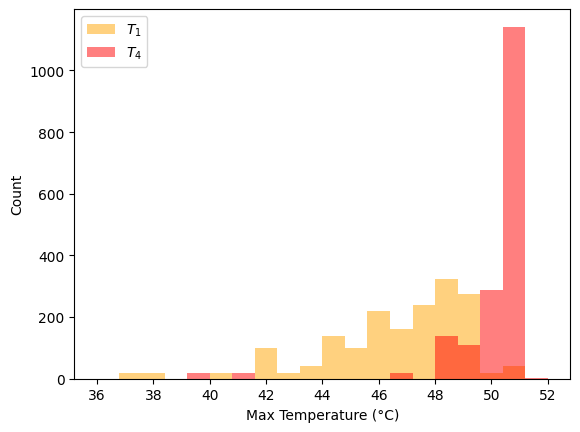

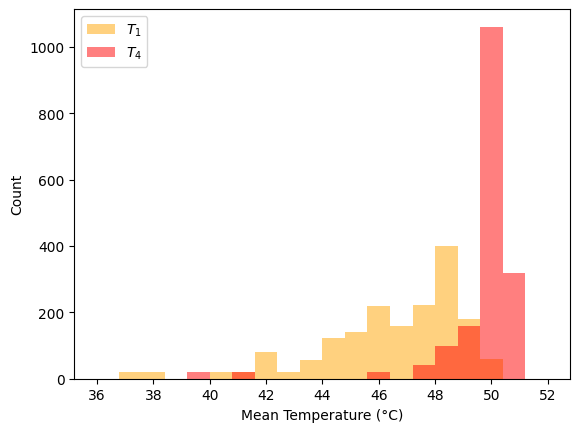

In [ ]:
df_t1 = df[(df['class_id'] == 1)]['temperature']
df_t4 = df[(df['class_id'] == 4)]['temperature']
ra = 36, 52

# plot the max temps
max_t1 = [df_t1.iloc[i].max() for i in range(len(df_t1))]
max_t4 = [df_t4.iloc[i].max() for i in range(len(df_t4))]
plt.hist(max_t1, bins=20, alpha=0.5, label='$T_1$', color='orange', range=ra)
plt.hist(max_t4, bins=20, alpha=0.5, label='$T_4$', color='red', range=ra)
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Count')
plt.legend()
plt.show()

# plot the mean temps
mean_t1 = [df_t1.iloc[i][:-64].mean() for i in range(len(df_t1))]
mean_t4 = [df_t4.iloc[i][:-64].mean() for i in range(len(df_t4))]
plt.hist(mean_t1, bins=20, alpha=0.5, label='$T_1$', color='orange', range=ra)
plt.hist(mean_t4, bins=20, alpha=0.5, label='$T_4$', color='red', range=ra)
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Count')
plt.legend()
plt.show()

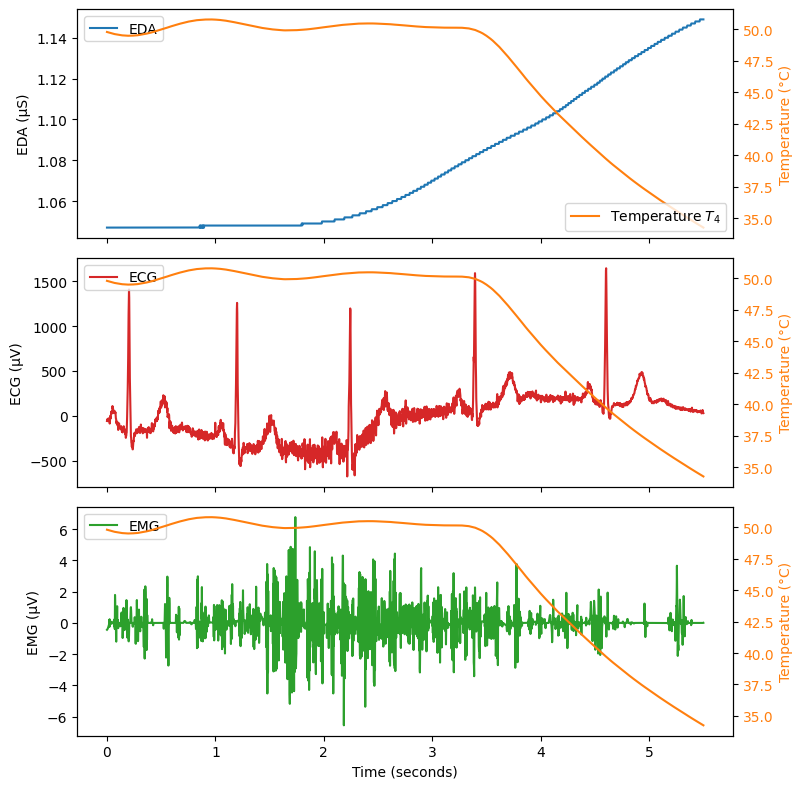

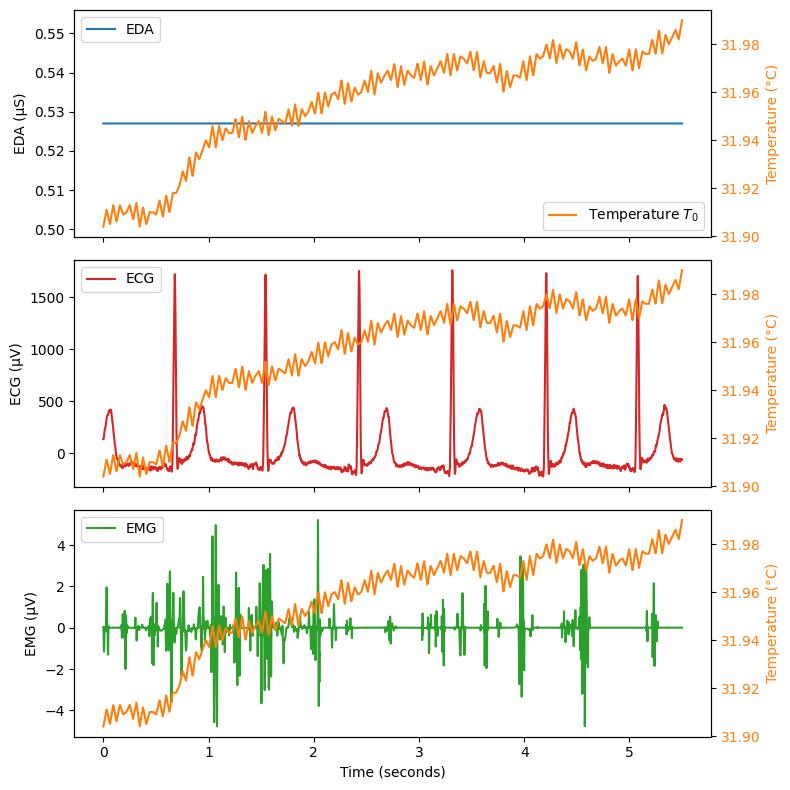

In [ ]:
def plot_sample(subject_name):
    sample = df[(df['sample_name'] == subject_name)].iloc[0]
    bio_signals = sample['bio_signals']
    temperature = sample['temperature']
    class_id = sample['class_id']

    fig, axs = plt.subplots(3, 1, sharex=True, figsize=(8, 8))

    signals = ['gsr', 'ecg', 'emg_trapezius']
    signal_legend = ['EDA', 'ECG', 'EMG']
    signal_labels = ['EDA (µS)', 'ECG (µV)', 'EMG (µV)']
    colors = ['tab:blue', 'tab:red', 'tab:green']

    # Interpolate temperature to match the length of bio_signals
    x = np.linspace(0, 1, len(temperature))
    x_new = np.linspace(0, 1, len(bio_signals['gsr']))
    temperature_interp = np.interp(x_new, x, temperature)

    time = np.linspace(0, 5.5, len(bio_signals['gsr']))

    for i, (signal, color) in enumerate(zip(signals, colors)):
        # signal
        axs[i].plot(time, bio_signals[signals[i]], color=color)
        axs[i].set_ylabel(signal_labels[i])
        axs[i].legend([signal_legend[i]], loc='upper left')
        if i == 2:
            axs[i].set_xlabel('Time (seconds)')

        # temperature
        axs_temp = axs[i].twinx()
        axs_temp.plot(time, temperature_interp, color='tab:orange')
        axs_temp.set_ylabel('Temperature (°C)', color='tab:orange')
        axs_temp.tick_params(axis='y', labelcolor='tab:orange')
        if i == 0:
            axs_temp.legend([f'Temperature $T_{class_id}$'], loc='lower right')
        
    plt.tight_layout()
    plt.show()

plot_sample('112914_w_51-PA4-057')
plot_sample('092509_w_51-BL1-089')

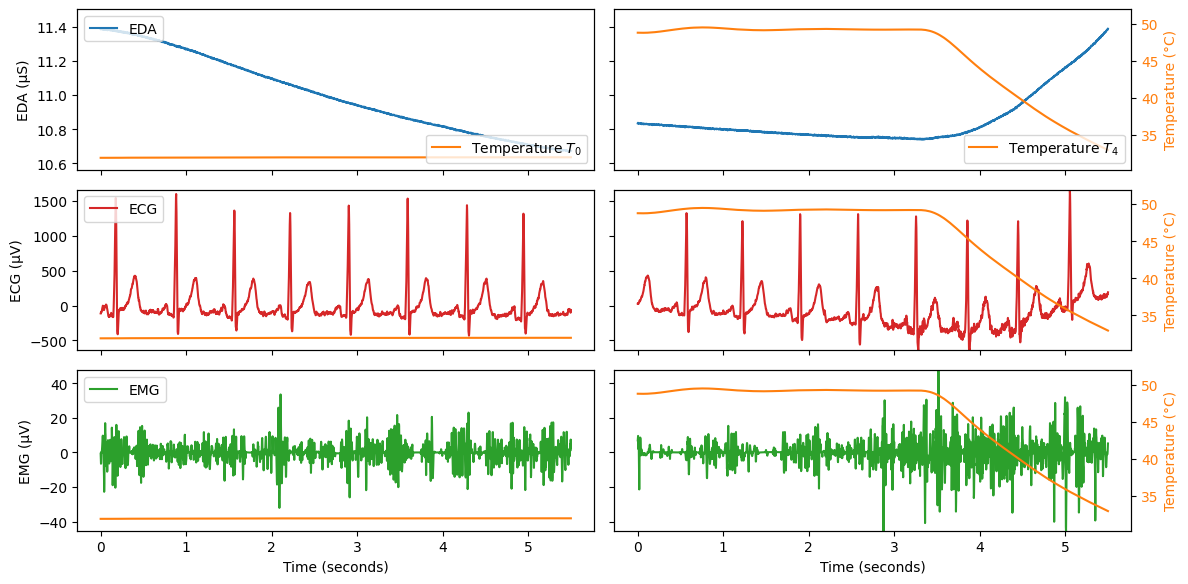

subject_name                                          071309_w_21
sample_name                                   071309_w_21-BL1-084
bio_signals                gsr        ecg  emg_trapezius
0    ...
temperature     0      31.922
1      31.919
2      31.925
3   ...
class_id                                                        0
Name: 3, dtype: object
subject_name                                          071309_w_21
sample_name                                   071309_w_21-PA4-068
bio_signals                gsr        ecg  emg_trapezius
0    ...
temperature     0      48.762
1      48.749
2      48.750
3   ...
class_id                                                        4
Name: 96, dtype: object


In [ ]:
def plot_two_samples(subject_name1, sample_index1, subject_name2, sample_index2):
    sample1 = df[(df['subject_name'] == subject_name1)].iloc[sample_index1]
    sample2 = df[(df['subject_name'] == subject_name2)].iloc[sample_index2]
    
    bio_signals1 = sample1['bio_signals']
    temperature1 = sample1['temperature']
    class_id1 = sample1['class_id']
    
    bio_signals2 = sample2['bio_signals']
    temperature2 = sample2['temperature']
    class_id2 = sample2['class_id']

    fig, axs = plt.subplots(3, 2, sharex='col', figsize=(12, 6))
    
    signals = ['gsr', 'ecg', 'emg_trapezius']
    signal_legend = ['EDA', 'ECG', 'EMG']
    signal_labels = ['EDA (µS)', 'ECG (µV)', 'EMG (µV)']
    colors = ['tab:blue', 'tab:red', 'tab:green']

    # Interpolate temperature to match the length of bio_signals
    x1 = np.linspace(0, 1, len(temperature1))
    x_new1 = np.linspace(0, 1, len(bio_signals1['gsr']))
    temperature_interp1 = np.interp(x_new1, x1, temperature1)
    
    x2 = np.linspace(0, 1, len(temperature2))
    x_new2 = np.linspace(0, 1, len(bio_signals2['gsr']))
    temperature_interp2 = np.interp(x_new2, x2, temperature2)

    time = np.linspace(0, 5.5, len(bio_signals1['gsr']))

    min_temp = min(temperature_interp1.min(), temperature_interp2.min()) * 0.95
    max_temp = max(temperature_interp1.max(), temperature_interp2.max()) * 1.05
    
    for i, (signal, color) in enumerate(zip(signals, colors)):
        # Determine the common signal scale for the row with some padding
        min_signal = min(bio_signals1[signal].min(), bio_signals2[signal].min()) * 0.99
        max_signal = max(bio_signals1[signal].max(), bio_signals2[signal].max()) * 1.01

        # signal of the first subject
        axs[i, 0].plot(time, bio_signals1[signals[i]], color=color)
        axs[i, 0].set_ylim([min_signal, max_signal])
        axs[i, 0].set_ylabel(signal_labels[i])
        axs[i, 0].legend([signal_legend[i]], loc='upper left')
        
        # temperature of the first subject
        axs_temp1 = axs[i, 0].twinx()
        axs_temp1.plot(time, temperature_interp1, color='tab:orange')
        axs_temp1.set_ylim([min_temp, max_temp])
        axs_temp1.tick_params(axis='y', labelcolor='tab:orange', labelleft=False)
        axs_temp1.set_yticks([])
        
        if i == 0:
            axs_temp1.legend([f'Temperature $T_{class_id1}$'], loc='lower right')
        
        # signal of the second subject
        axs[i, 1].plot(time, bio_signals2[signals[i]], color=color)
        axs[i, 1].set_ylim([min_signal, max_signal])
        
        # temperature of the second subject
        axs_temp2 = axs[i, 1].twinx()
        axs_temp2.plot(time, temperature_interp2, color='tab:orange')
        axs_temp2.set_ylim([min_temp, max_temp])
        axs_temp2.set_ylabel('Temperature (°C)', color='tab:orange')
        axs_temp2.tick_params(axis='y', labelcolor='tab:orange')
        if i == 0:
            axs_temp2.legend([f'Temperature $T_{class_id2}$'], loc='lower right')

    for ax in axs[:, 1]:
        ax.yaxis.set_tick_params(labelleft=False)

    for i in range(3):
        axs[i, 0].right_ax = None

    axs[2, 0].set_xlabel('Time (seconds)')
    axs[2, 1].set_xlabel('Time (seconds)')

    plt.tight_layout()
    #plt.savefig('two_samples.pdf', format='pdf')
    plt.show()


plot_two_samples('071309_w_21', 3, '071309_w_21', 96)

print(df[(df['subject_name'] == '071309_w_21')].iloc[3])
print(df[(df['subject_name'] == '071309_w_21')].iloc[96])

In [10]:
# descriptive statistics of the mean values of the biosignals
rows = []

for _, row in df[['bio_signals', 'class_id']].iterrows():
    row_dict = {
        'gsr_mean': np.mean(row['bio_signals']['gsr']), 
        'ecg_mean': np.mean(row['bio_signals']['ecg']), 
        'emg_mean': np.mean(row['bio_signals']['emg_trapezius']), 
        'class_id': row['class_id']
    }
    rows.append(row_dict)

df_means = pd.DataFrame(rows)
for signal in ['gsr_mean', 'ecg_mean', 'emg_mean']:
    print(signal)
    display(df_means.groupby('class_id')[signal].describe())


gsr_mean


,count,mean,std,min,25%,50%,75%,max
class_id,,,,,,,,
0,1740.0,3.362178,2.845968,0.466476,1.574692,2.438309,3.999152,17.766387
1,1740.0,3.390039,2.889513,0.468451,1.586994,2.450372,4.023146,18.545310
2,1740.0,3.413737,2.904991,0.469126,1.576714,2.487863,4.124906,18.398636
3,1740.0,3.474064,2.979215,0.464244,1.612926,2.548918,4.043015,19.754434
4,1740.0,3.566833,3.101049,0.463708,1.627012,2.581704,4.236282,22.029433


ecg_mean


,count,mean,std,min,25%,50%,75%,max
class_id,,,,,,,,
0,1740.0,0.056282,24.945936,-334.032980,-6.904096,0.023216,6.413806,244.199593
1,1740.0,1.056838,27.453925,-324.700693,-6.405696,-0.087761,6.905951,318.750472
2,1740.0,1.600562,31.748796,-354.533010,-6.538393,0.688487,7.789750,343.284926
3,1740.0,0.827727,38.785598,-337.763066,-8.946017,-0.566460,7.872346,531.278167
4,1740.0,2.154879,53.273401,-334.525113,-10.807825,-0.334235,10.673903,677.044582


emg_mean


,count,mean,std,min,25%,50%,75%,max
class_id,,,,,,,,
0,1740.0,-0.020696,0.419772,-8.428108,-0.014070,-0.001196,0.005768,1.678335
1,1740.0,-0.024962,0.430747,-8.762902,-0.014953,-0.001497,0.006033,1.906103
2,1740.0,-0.029464,0.501283,-10.036897,-0.012776,-0.000984,0.006047,2.375501
3,1740.0,-0.009579,0.321453,-6.524714,-0.015212,-0.001440,0.007165,2.566210
4,1740.0,-0.035070,0.495698,-10.915606,-0.018783,-0.001359,0.007753,2.318537


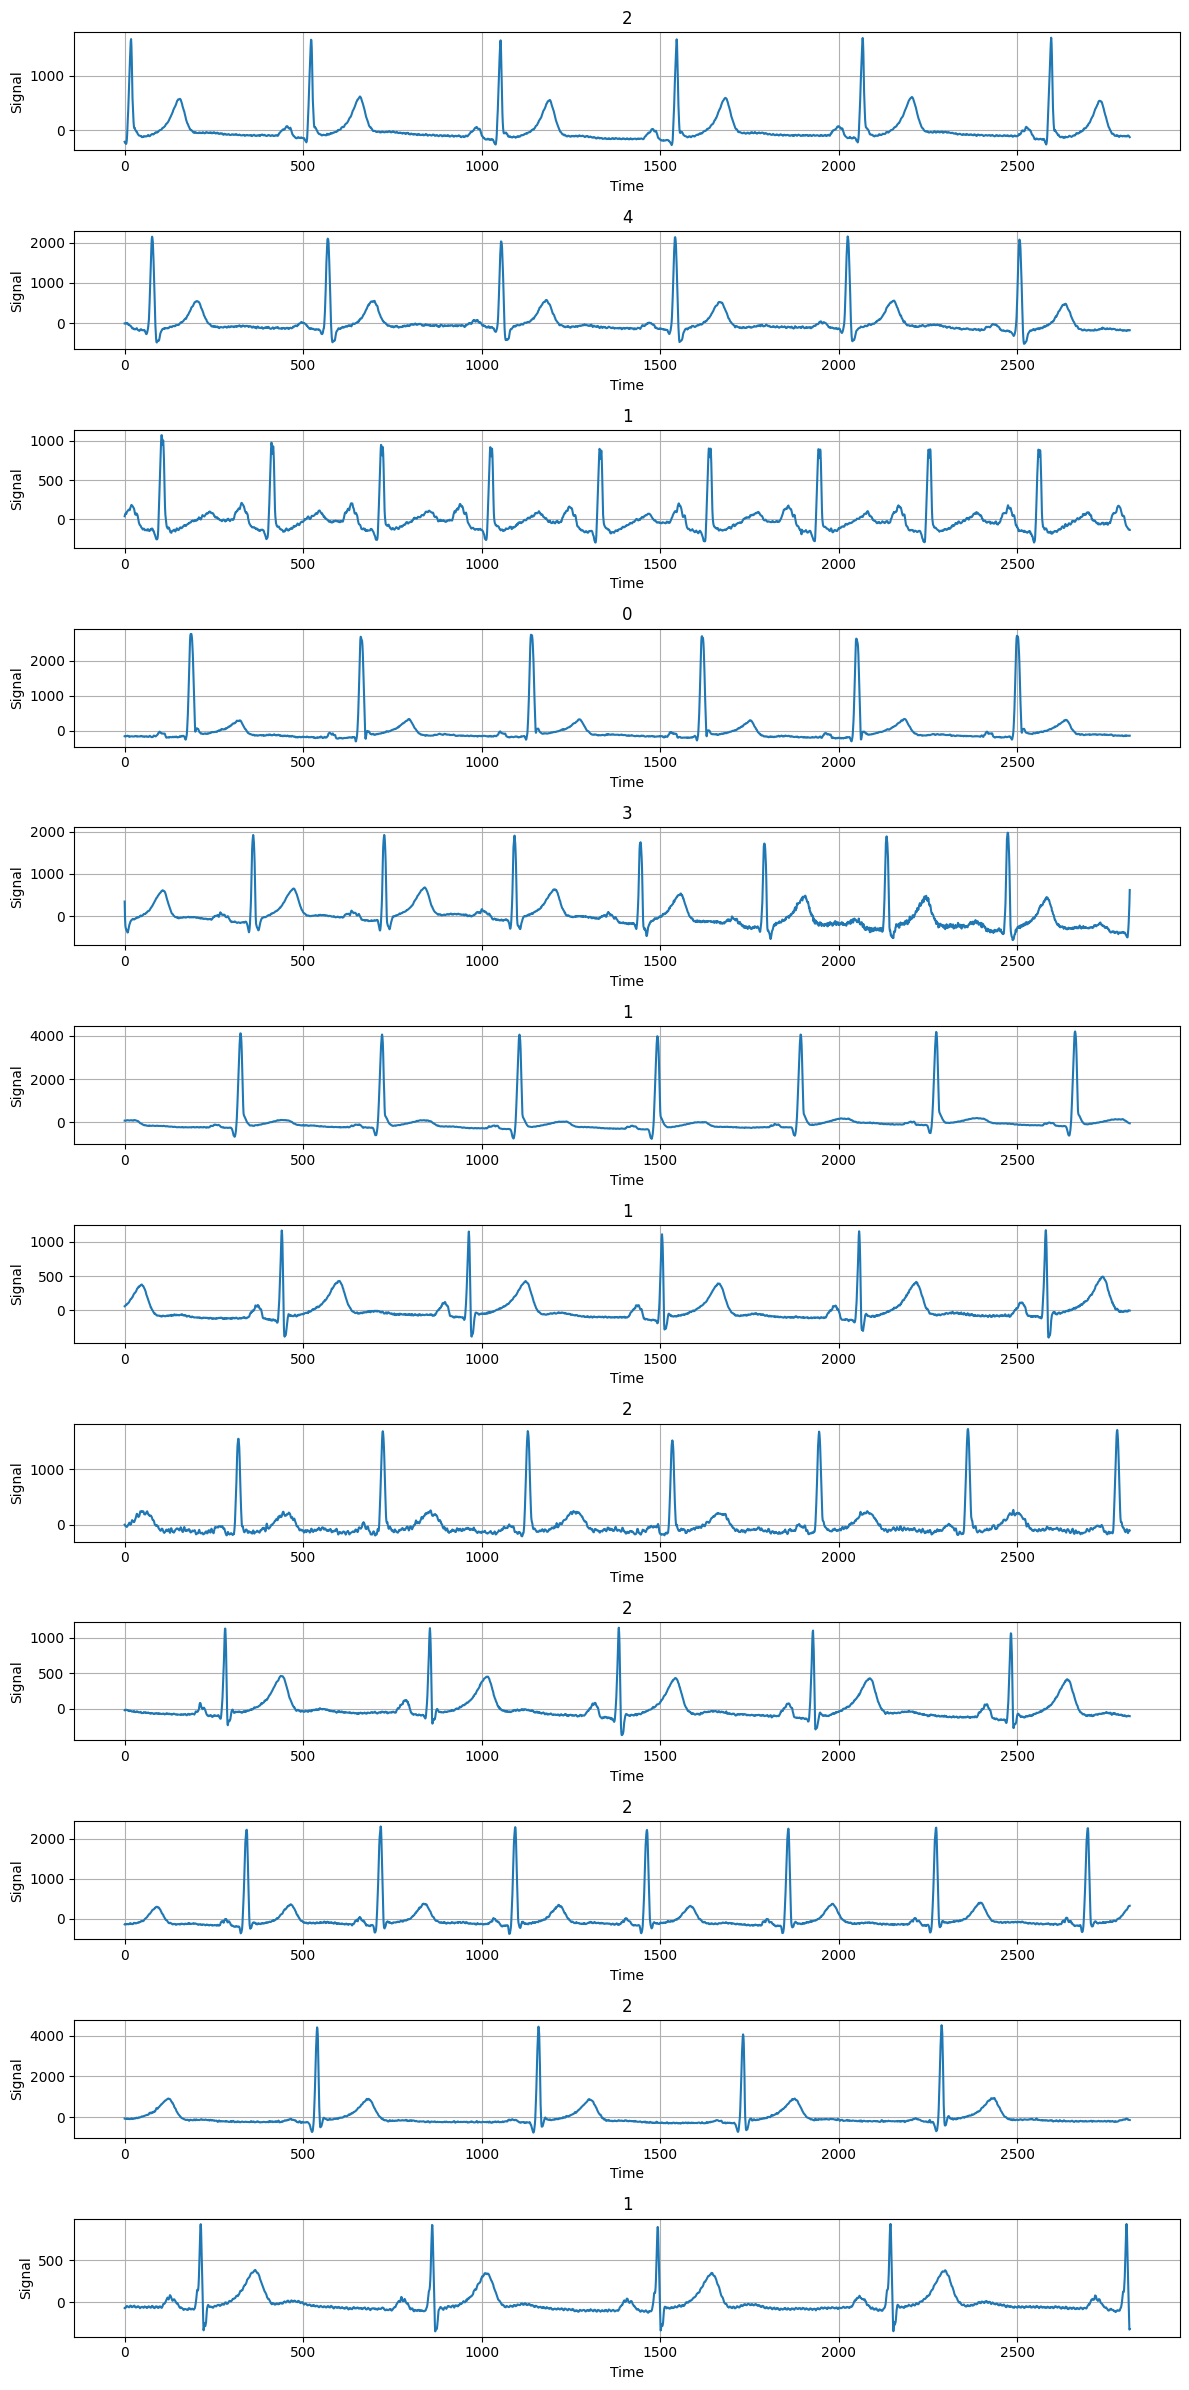

In [52]:
def examples(signal, num):
    fig, axs = plt.subplots(num, 1, figsize=(12, 24))

    for i in range(num):
        sample = df.sample()
        data = sample.iloc[0]['bio_signals'][signal]
        class_id = sample.iloc[0]['class_id']
        axs[i].plot(data)
        axs[i].title.set_text(class_id)
        axs[i].set_xlabel('Time')
        axs[i].set_ylabel('Signal')
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()

examples('ecg', 12)

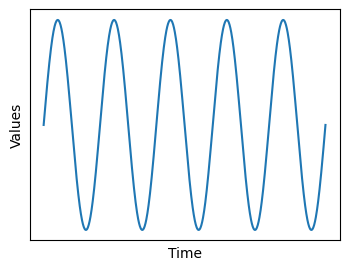

In [ ]:
x = np.linspace(0, 2 * np.pi * 5, 1000)
y = np.sin(x)

plt.figure(figsize=(4, 3))
plt.plot(x, y)

plt.xticks([])
plt.yticks([])
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

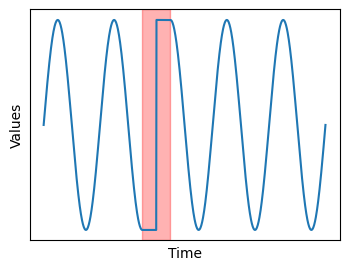

In [ ]:
# example for a shaplet anomaly
start_outlier = 7/2 * np.pi
end_outlier = 9/2 * np.pi

y_outlier = y.copy()
outlier_region = (x >= start_outlier) & (x <= end_outlier)
y_outlier[outlier_region] = np.sign(np.sin(x[outlier_region]))

plt.figure(figsize=(4, 3))
plt.plot(x, y_outlier)

plt.axvspan(start_outlier, end_outlier, color='red', alpha=0.3)

plt.xticks([])
plt.yticks([])
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()


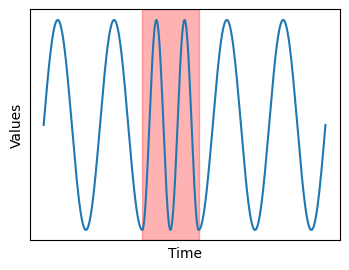

In [ ]:
# example for a seasonal anomaly
start_outlier = 7/2 * np.pi
end_outlier = 11/2 * np.pi

y_outlier = y.copy()
outlier_region = (x >= start_outlier) & (x <= end_outlier)
y_outlier[outlier_region] = np.sin(2 * x[outlier_region] + np.pi / 2)

plt.figure(figsize=(4, 3))
plt.plot(x, y_outlier)

plt.axvspan(start_outlier, end_outlier, color='red', alpha=0.3)

plt.xticks([])
plt.yticks([])
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()



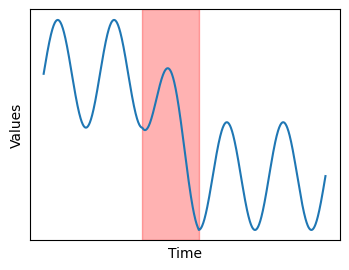

In [ ]:
# example for a trend anomaly
y_trend = np.copy(y)
trend_start = 7 * np.pi / 2
trend_end = trend_start + 2 * np.pi

trend_slope = -0.3
x_trend = x[(x >= trend_start) & (x <= trend_end)]
y_trend[(x >= trend_start) & (x <= trend_end)] = np.sin(x_trend) + trend_slope * (x_trend - trend_start)
y_trend[x > trend_end] -= 1.9

plt.figure(figsize=(4, 3))
plt.plot(x, y_trend)

plt.axvspan(trend_start, trend_end, color='red', alpha=0.3)

plt.xticks([])
plt.yticks([])
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()
